In [1]:
import numpy as np
import pandas as pd
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import BernoulliArm
from banditpylib.bandits import ThresholdingBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.thresholding_bandit_learner import APT, Uniform

In [2]:
def play_game(means, budget, eps=0.1, trials=5000):
  arms = [BernoulliArm(mean) for mean in means]
  theta = 0.5
  bandit = ThresholdingBandit(arms=arms, theta=theta, eps=eps)
  learners = [APT(arm_num=len(arms), theta=theta, eps=eps), 
              Uniform(arm_num=len(arms), theta=theta, eps=eps)]
  gap = 100
  # Report intermediate regrets after these horizons
  intermediate_horizons = list(range(0, budget+1, gap))[1:]
  temp_file = tempfile.NamedTemporaryFile()
  
  game = SinglePlayerProtocol(bandit=bandit, learners=learners)

  # Start playing the game
  # Add `debug=True` for debugging purpose
  game.play(trials, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=budget)
  
  trials_df = trials_to_dataframe(temp_file.name)
  
  trials_df = trials_df.groupby(['learner', 'total_actions'])['regret'].mean().reset_index()
  trials_df['regret'] = np.log(trials_df['regret'])
  trials_df = trials_df.replace(float('nan'), 0)
  
  sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)

INFO:absl:start apt's play with thresholding_bandit
INFO:absl:apt's play with thresholding_bandit runs 66.10 seconds.
INFO:absl:start uniform_sampling's play with thresholding_bandit
INFO:absl:uniform_sampling's play with thresholding_bandit runs 44.17 seconds.


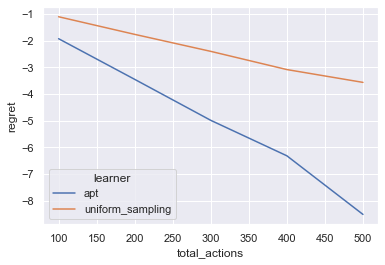

In [3]:
means=[0.1, 0.1, 0.1, 0.35, 0.45, 0.55, 0.65, 0.9, 0.9, 0.9]
play_game(means, 500)